# Curso NLP + Transformers

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

# Análisis de Reseñas de Amazon 📦🔍

## 1) Carga y Exploración del Dataset 🤓

**Objetivo: Exploración del Dataset.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Descomprimir el archivo .rar

In [2]:
!unrar x "/content/reviews_dataframe_completo.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/reviews_dataframe_completo.rar

Extracting  reviews_dataframe_completo.csv                                29% 59% 89%100%  OK 
All OK


Carga del dataset

In [2]:
csv_path = "datasets/reviews_dataframe_completo.csv"
original_data = pd.read_csv(csv_path)

Visualizamos las primeras filas del dataset

In [3]:
original_data.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


In [4]:
original_data.tail(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
209998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless
209999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel


Distribución de las puntuaciones (stars)

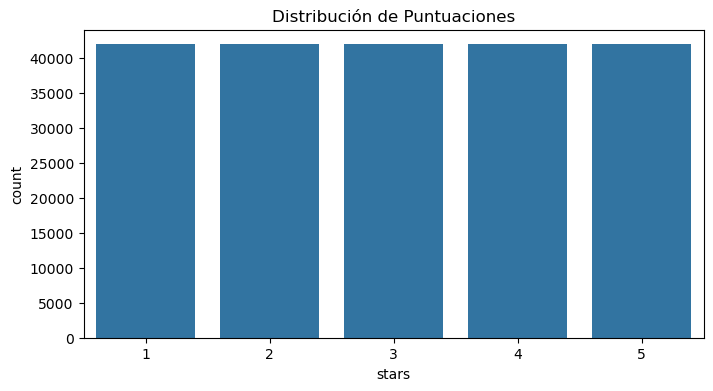

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stars', data=original_data)
plt.title('Distribución de Puntuaciones')
plt.show()

Distribución de las categorías de productos

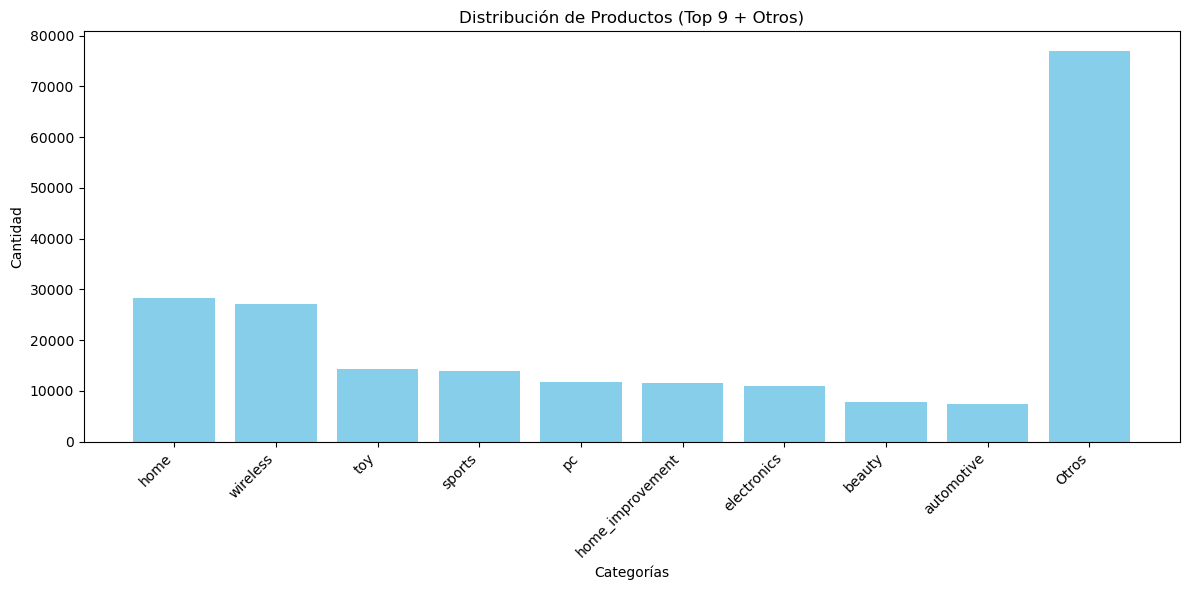

In [6]:
# Contar las categorías
product_category = original_data["product_category"].value_counts()

# Si hay más de 10 categorías, se toman las 9 principales y se agrupan las restantes en "Otros"
if len(product_category) > 10:
   # Toma las primeras 9 categorías
    top_categories = product_category.iloc[:9].copy()
   # Suma las categorías restantes (desde la 10ma en adelante)
    others = product_category.iloc[9:].sum()
    top_categories["Otros"] = others
else:
    top_categories = product_category

# Preparar etiquetas y valores
categories = top_categories.index
values = top_categories.values

plt.figure(figsize=(12,6))
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categorías")
plt.ylabel("Cantidad")
plt.title("Distribución de Productos (Top 9 + Otros)")
plt.tight_layout()
plt.show()


## 2) Preprocesamiento Inicial y Limpieza del Texto 👌

**Objetivo: Realizar un preprocesamiento con Regex (Expresiones Regulares).**

**Regex: Es una secuencia de caracteres que define un patrón de búsqueda**.

Se utiliza para ***describir, identificar y manipular*** cadenas de texto de manera eficiente.

Con expresiones regulares, puedes buscar coincidencias, extraer subcadenas, reemplazar partes de un texto o validar formatos de datos.

Nos vamos a quedar solo con la data de interés

In [7]:
filter_data = original_data[["review_body", "stars"]].copy()

In [8]:
filter_data.head(3)

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1


Evaluar valores nulos

In [9]:
filter_data.isnull().sum()

review_body    0
stars          0
dtype: int64

Limpiar el texto

In [10]:
import re
import string

In [11]:
"""
Estructura de la Función re.sub():

re.sub(pattern, replacement, string)

-re.sub(): Función para sustituir patrones en texto
-pattern: Patrón regex a buscar (r'[^\w\s]')
-replacement: Texto de reemplazo ('' = cadena vacía = eliminar)
-string: Texto a procesar (text)
"""
def clean(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar textos entre corchetes (ej.: etiquetas)
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # Eliminar signos de puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Eliminar saltos de línea
    text = re.sub(r'\n', ' ', text)

    # Eliminar palabras que contienen números
    text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar emojis y caracteres especiales (no ASCII)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Eliminar espacios extras al inicio y final
    text = text.strip()

    return text

Aplicar la función de limpieza a la columna 'review_body'

In [12]:
"""
.apply(clean):

Aplica la función clean a cada elemento de la columna
"""

filter_data["clean_review"] = filter_data["review_body"].apply(clean)

Ejemplo de reseña original vs. limpia:

In [13]:
filter_data[['review_body', 'clean_review']].head(3)

,review_body,clean_review
0,Nada bueno se me fue ka pantalla en menos de 8...,nada bueno se me fue ka pantalla en menos de ...
1,"Horrible, nos tuvimos que comprar otro porque ...",horrible nos tuvimos que comprar otro porque n...
2,Te obligan a comprar dos unidades y te llega s...,te obligan a comprar dos unidades y te llega s...


## 3) Tokenización y Segmentación de Reseñas 📊

**Objetivo: Realizar la tokenización y segmentación (división en palabras y oraciones) utilizando nltk y spaCy con modelos adaptados al español.**

**Tokenización:**
**Es el proceso de dividir el texto en unidades más pequeñas, llamadas tokens** (por ejemplo, palabras o signos de puntuación).

Esto es esencial para análisis posteriores como el conteo de palabras o la vectorización.

**Segmentación en Oraciones:**
Permite dividir el texto en oraciones, lo cual es útil para el análisis sintáctico y para preservar el contexto de cada enunciado.

### 📍 Con nltk

In [14]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

Descargar recursos de tokenización para español

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Seleccionar un ejemplo de reseña limpia

In [16]:
sample_text = filter_data["clean_review"].iloc[1]
print("Texto de ejemplo:", sample_text)

Texto de ejemplo: horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingls ni un informtico despus de una hora fue capaz de instalarlo


Tokenización y segmentación con nltk (para español)

In [17]:
tokens_nltk = word_tokenize(sample_text, language="spanish")
sentences_nltk = sent_tokenize(sample_text, language="spanish")

In [26]:
print("Tokens con nltk:", tokens_nltk)
print("Oraciones con nltk:", sentences_nltk)

Tokens con nltk: ['horrible', 'nos', 'tuvimos', 'que', 'comprar', 'otro', 'porque', 'ni', 'nosotros', 'que', 'sabemos', 'ingls', 'ni', 'un', 'informtico', 'despus', 'de', 'una', 'hora', 'fue', 'capaz', 'de', 'instalarlo']
Oraciones con nltk: ['horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingls ni un informtico despus de una hora fue capaz de instalarlo']


### 📍 Con spaCy

In [20]:
import spacy

In [22]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
      --------------------------------------- 0.3/12.9 MB ? eta -:--:--
      --------------------------------------- 0.3/12.9 MB ? eta -:--:--
      --------------------------------------- 0.3/12.9 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.9 MB 540.5 kB/s eta 0:00:23
     - ------------------------------------- 0.5/12.9 MB 540.5 kB/s eta 0:00:23
     -- ------------------------------------ 0.8/12.9 MB 508.0 kB/s eta 0:00:24
     -- ------------------------------------ 0.8/12.9 MB 508.0 kB/s eta 0:00:24
     -- ------------------------------------ 0.8/12.9 MB 508.0 kB/s eta 0:00:24
     --- ----------------------------------- 1.0/12.9 MB 535.4 kB/s eta 0:00:23
     --- ----------------------------------- 1.3/12.9 MB 578.4 kB/s eta 0:00:21
     --- ----------------------------------- 1.3/12.9 MB 578.4 kB/s eta 0:00:21


In [23]:
nlp_es = spacy.load('es_core_news_sm')
doc_es = nlp_es(sample_text)

In [24]:
tokens_spacy = [token.text for token in doc_es]
sentences_spacy = [sent.text for sent in doc_es.sents]

In [25]:
print("Tokens con spaCy:", tokens_spacy)
print("Oraciones con spaCy:", sentences_spacy)

Tokens con spaCy: ['horrible', 'nos', 'tuvimos', 'que', 'comprar', 'otro', 'porque', 'ni', 'nosotros', 'que', 'sabemos', 'ingls', 'ni', 'un', 'informtico', 'despus', 'de', 'una', 'hora', 'fue', 'capaz', 'de', 'instalarlo']
Oraciones con spaCy: ['horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingls ni un informtico despus de una hora fue capaz de instalarlo']


## 4) Stemming y Lematización para Reseñas 📚
**Objetivo: Refinar el preprocesamiento aplicando eliminación de stopwords, stemming y lematización para ver su efecto en las reseñas.**

**Stemming:** Consiste en recortar las palabras para reducirlas a su raíz (por ejemplo, "comprando" a "compr").

Sin embargo, este método puede producir resultados poco legibles y perder matices semánticos.
  
**Lematización:** Reduce las palabras a su forma canónica (o lema), preservando mejor el significado (por ejemplo, "comprando" se convierte en "comprar").

**Eliminación de Stopwords:**
Se utiliza para eliminar palabras muy comunes que no aportan información relevante (como “el”, “de”, “y”).

In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

Descargar recursos necesarios en español

In [27]:
nltk.download('stopwords')
stopword_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Definir el stemmer para español
stemmer_es = SnowballStemmer("spanish")

# Seleccionar un ejemplo de reseña limpia
sample_text = filter_data["clean_review"].iloc[1]
print("Texto de ejemplo:", sample_text)

# Tokenización con nltk
tokens = word_tokenize(sample_text, language="spanish")

Texto de ejemplo: horrible nos tuvimos que comprar otro porque ni nosotros que sabemos ingls ni un informtico despus de una hora fue capaz de instalarlo


In [60]:
print("Tokens:", tokens)

Tokens: ['horrible', 'nos', 'tuvimos', 'que', 'comprar', 'otro', 'porque', 'ni', 'nosotros', 'que', 'sabemos', 'ingls', 'ni', 'un', 'informtico', 'despus', 'de', 'una', 'hora', 'fue', 'capaz', 'de', 'instalarlo']


In [29]:
# Eliminar stopwords
tokens_no_stop = [word for word in tokens if word not in stopword_es]
print("Tokens sin stopwords:", tokens_no_stop)

# Aplicar stemming
stemmed_tokens = [stemmer_es.stem(token) for token in tokens_no_stop]
print("Tokens después de stemming:", stemmed_tokens)

# Aplicar lematización usando spaCy
doc_es = nlp_es(sample_text)
lemmatized_tokens = [token.lemma_ for token in doc_es if token.text.lower() not in stopword_es]
print("Tokens después de lematización (sin stopwords):", lemmatized_tokens)

Tokens sin stopwords: ['horrible', 'comprar', 'sabemos', 'ingls', 'informtico', 'despus', 'hora', 'capaz', 'instalarlo']
Tokens después de stemming: ['horribl', 'compr', 'sab', 'ingls', 'informt', 'despus', 'hor', 'capaz', 'instal']
Tokens después de lematización (sin stopwords): ['horrible', 'comprar', 'saber', 'ingls', 'informtico', 'despus', 'hora', 'capaz', 'instalar él']


## 5) Visualización y Análisis Exploratorio del Texto 👀

**Objetivo: Visualizar la frecuencia de términos mediante nubes de palabras.**

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### 📍 Reseñas Limpias

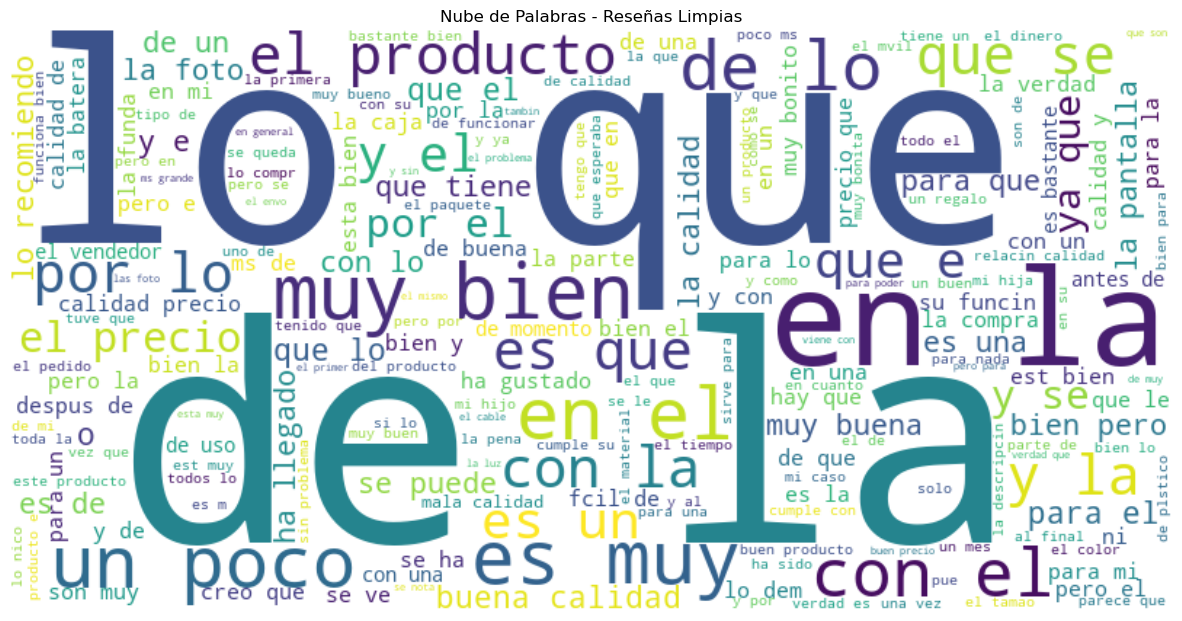

In [32]:
# Generar nube de palabras con las reseñas limpias
text = " ".join(review for review in filter_data["clean_review"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Reseñas Limpias")
plt.show()

### 📍 Reseñas Limpias + Stopwords + Stemming

In [33]:
def clean_with_stopwords_and_stemming(text):
    # Eliminar stopwords
    text = " ".join([word for word in text.split() if word not in stopword_es])
    # Aplicar stemming
    text = " ".join([stemmer_es.stem(word) for word in text.split()])
    # Eliminar espacios extras al inicio y final
    return text.strip()

In [34]:
filter_data["clean_review_stemming"] = filter_data["clean_review"].apply(clean_with_stopwords_and_stemming)

# Mostrar ejemplos de texto limpio vrs texto limpio avanzado
filter_data[['clean_review', 'clean_review_stemming']].head(3)

,clean_review,clean_review_stemming
0,nada bueno se me fue ka pantalla en menos de ...,buen ka pantall men mes recib respuest fabric
1,horrible nos tuvimos que comprar otro porque n...,horribl compr sab ingls informt despus hor cap...
2,te obligan a comprar dos unidades y te llega s...,oblig compr dos unidad lleg sol form reclam au...


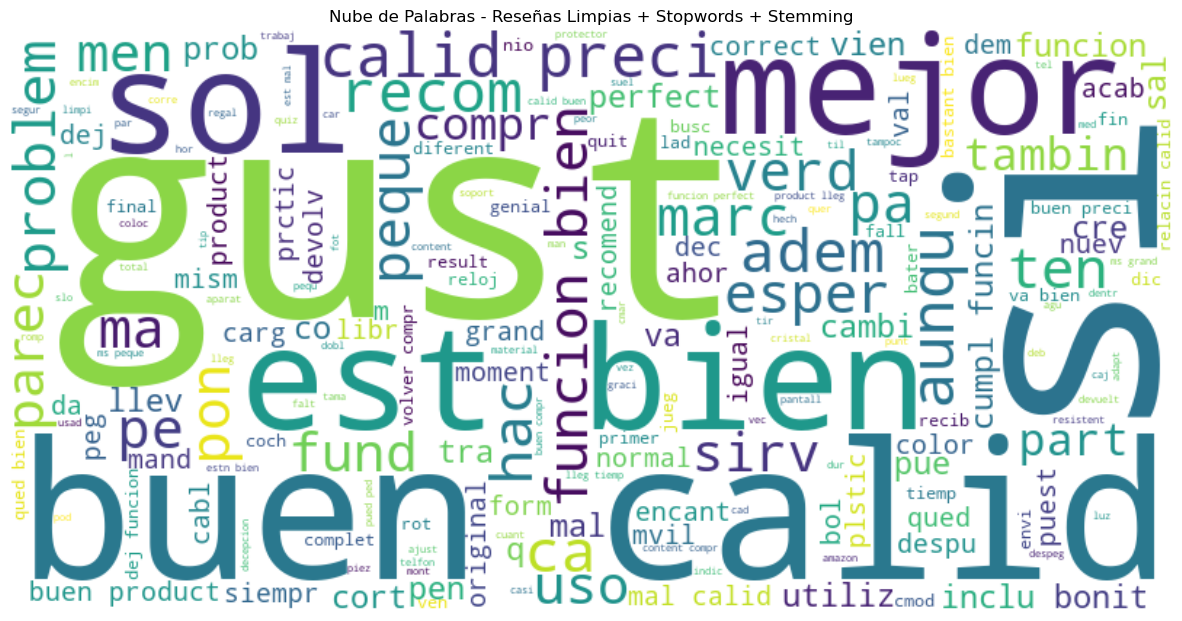

In [35]:
# Generar nube de palabras con las Reseñas Limpias + Stopwords + Stemming
text = " ".join(review for review in filter_data["clean_review_stemming"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Reseñas Limpias + Stopwords + Stemming")
plt.show()

### 📍 Reseñas Limpias + Stopwords + Lemmatization

In [37]:
def clean_with_stopwords_and_lemmatization(text):
    # Procesar el texto usando spaCy
    doc = nlp_es(text)
    # Eliminar stopwords y aplicar lematización
    lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_es]
    # Unir los tokens lematizados y eliminar espacios extra
    return " ".join(lemmatized).strip()

In [38]:
filter_data["clean_review_lemmatization"] = filter_data["clean_review"].apply(clean_with_stopwords_and_lemmatization)

# Mostrar ejemplos de texto limpio vrs texto limpio avanzado
filter_data[['clean_review', 'clean_review_lemmatization']].head(3)

,clean_review,clean_review_lemmatization
0,nada bueno se me fue ka pantalla en menos de ...,bueno ko pantallar menos mes recibir respues...
1,horrible nos tuvimos que comprar otro porque n...,horrible comprar saber ingls informtico despus...
2,te obligan a comprar dos unidades y te llega s...,obligar comprar dos unidad llegar solo forma r...


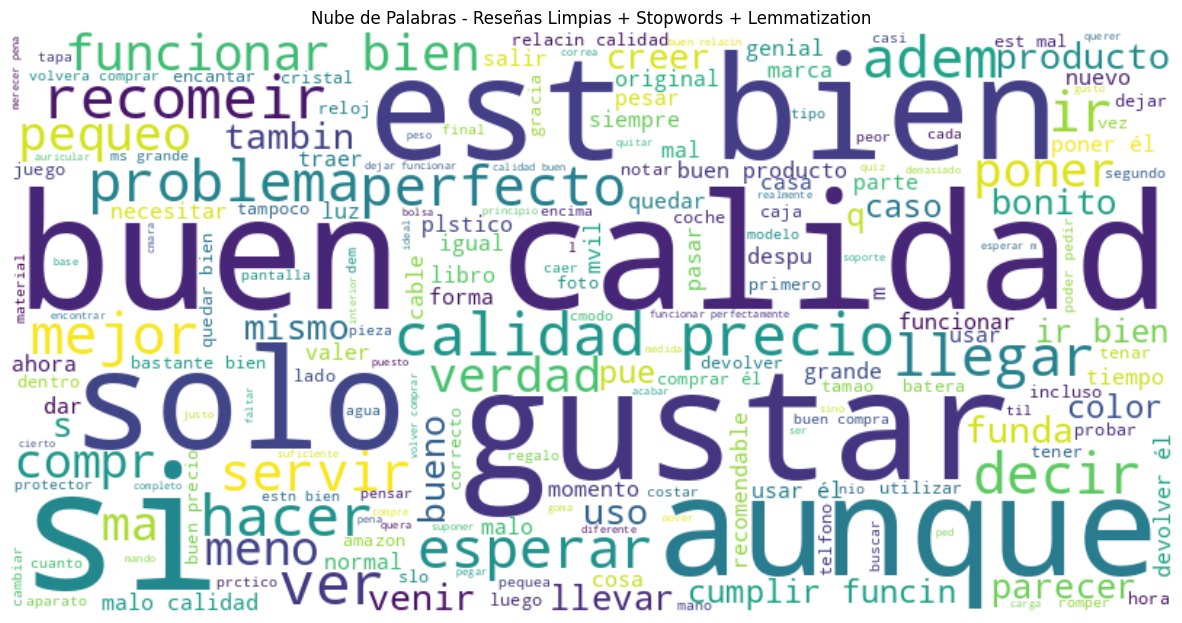

In [39]:
# Generar nube de palabras con las Reseñas Limpias + Stopwords + Lemmatization
text = " ".join(review for review in filter_data["clean_review_lemmatization"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Reseñas Limpias + Stopwords + Lemmatization")
plt.show()

---
## 6) Guardar dataset limpio 💾

**Objetivo: Este dataset nos va a servir en etapas posteriores.**

In [40]:
filter_data[["clean_review_lemmatization", "stars"]].to_csv("reviews_clean_advanced.csv", index=False)

# Curso NLP + Transformers

## 1) Carga y Exploración del Dataset 🤓

**Objetivo: Exploración del Dataset.**

In [1]:
import pandas as pd

In [2]:
csv_path = "datasets/reviews_clean_advanced.csv"
filter_data = pd.read_csv(csv_path)

Visualizamos las primeras filas del dataset

In [3]:
filter_data.head(3)

,clean_review_lemmatization,stars
0,bueno kar pantalla menos mes recibir respues...,1
1,horrible comprar saber ingls informtico despu ...,1
2,obligar comprar dos unidad llegar solo forma r...,1


Evaluar los valores nulos

In [4]:
filter_data.isnull().sum()

clean_review_lemmatization    1
stars                         0
dtype: int64

In [5]:
filter_data = filter_data.dropna()

## 2) Representación Vectorial: Bag-of-Words y TF-IDF 📁

**Objetivo: Convertir las reseñas en representaciones numéricas mediante Bag-of-Words y TF-IDF para su posterior análisis.**

**Bag-of-Words (BoW):** Es una técnica que convierte texto en una representación numérica al contar la frecuencia de cada palabra en un documento, ignorando el orden y la gramática.

Cada documento se representa como un vector donde cada dimensión corresponde a una palabra del vocabulario y el valor es la frecuencia de esa palabra en el documento.

**TF-IDF (Term Frequency-Inverse Document Frequency):** Esta técnica mejora la representación BoW al ponderar la frecuencia de las palabras por su importancia en el corpus.

Calcula la frecuencia de una palabra en un documento (TF) y la multiplica por la inversa de la frecuencia de documentos que contienen esa palabra (IDF), reduciendo la influencia de palabras comunes y destacando términos más informativos.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Crear el corpus a partir de las reseñas limpias

In [7]:
corpus = filter_data["clean_review_lemmatization"].tolist()

### 📍 Representación Bag-of-Words con CountVectorizer

In [8]:
cv = CountVectorizer()
bow_matrix = cv.fit_transform(corpus)
print("Dimensiones de la matriz Bag-of-Words:", bow_matrix.shape)
print("Ejemplo de términos (BoW):", cv.get_feature_names_out()[:10])

Dimensiones de la matriz Bag-of-Words: (209999, 61223)
Ejemplo de términos (BoW): ['aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaao' 'aac' 'aad' 'aada' 'aadar']


### 📍 Representación TF-IDF con TfidfVectorizer

Examinar las palabras con mayor peso TF-IDF para identificar términos relevantes en el texto.

In [9]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
print("Dimensiones de la matriz TF-IDF:", tfidf_matrix.shape)
print("Ejemplo de términos (TF-IDF):", tfidf.get_feature_names_out()[:10])

Dimensiones de la matriz TF-IDF: (209999, 61223)
Ejemplo de términos (TF-IDF): ['aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaao' 'aac' 'aad' 'aada' 'aadar']


## 3) Extracción de Términos Clave y Modelado de Temas 🔍

**Objetivo: Utilizar LDA para extraer temas y términos clave de las reseñas.**

**Modelado de temas con LDA (Latent Dirichlet Allocation)**: LDA es una técnica de modelado generativo que asume que cada documento es una mezcla de temas y que cada tema es una mezcla de palabras. Ayuda a descubrir temas ocultos en una colección de documentos.

**Extracción de palabras clave:** Métodos como la frecuencia de términos, TF-IDF y algoritmos como RAKE (Rapid Automatic Keyword Extraction) se utilizan para identificar palabras o frases que capturan la esencia de un documento.

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

Aplicar LDA sobre la matriz Bag-of-Words para extraer 5 temas

In [11]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(bow_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [12]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Tema %d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [13]:
display_topics(lda, cv.get_feature_names_out(), 10)

Tema 0:
llegar producto él venir devolver dar poder amazon caja si
Tema 1:
funcionar bien él luz dar dejar cable batera ms ir
Tema 2:
bien él si hacer poder quedar ir pantalla poner ms
Tema 3:
calidad buen precio bien producto ms cumplir bonito perfecto color
Tema 4:
bien ms él pequeo perfecto grande comprar gustar tamao si


## 4) Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎

**Objetivo: Entrenar y evaluar un clasificador (Naive Bayes) para determinar el sentimiento (positivo/negativo) de las reseñas.**

**Naive Bayes:** Es un clasificador probabilístico basado en el teorema de Bayes, que asume la independencia entre las características.

**Calcula la probabilidad de que un documento pertenezca a una clase (por ejemplo, positivo o negativo) asumiendo que las características (palabras) son independientes entre sí.**

Esta suposición "ingenua" simplifica mucho los cálculos y permite entrenar y predecir rápidamente, algo muy útil en entornos donde el tiempo y los recursos pueden ser limitados.


Definición: Se considera reseña positiva cuando la puntuación ("stars") es mayor que 3; negativa en caso contrario.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

Crear la variable binaria de sentimiento: 1 (positivo) si stars > 3, 0 (negativo) de lo contrario

In [15]:
filter_data["sentiment_bin"] = filter_data["stars"].apply(lambda x: 1 if x > 3 else 0)

Usar la representación TF-IDF para el modelo

In [16]:
X = tfidf_matrix
y = filter_data["sentiment_bin"]

Dividir el dataset en entrenamiento y prueba

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenar el clasificador Naive Bayes

In [18]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Evaluar el modelo

In [19]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7911190476190476
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     25204
           1       0.83      0.60      0.70     16796

    accuracy                           0.79     42000
   macro avg       0.80      0.76      0.77     42000
weighted avg       0.80      0.79      0.78     42000



**Guardar el modelo**

In [22]:
import joblib

model_path = "datasets/nb_classifier_model.pkl"
joblib.dump(nb_classifier, model_path)

['datasets/nb_classifier_model.pkl']

**Cargar el modelo**

In [23]:
mi_modelo = joblib.load(model_path)

**Probar con nueva data**

In [24]:
import re
import string


def clean(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar textos entre corchetes (ej.: etiquetas)
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # Eliminar signos de puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Eliminar saltos de línea
    text = re.sub(r'\n', ' ', text)

    # Eliminar palabras que contienen números
    text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar emojis y caracteres especiales (no ASCII)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Eliminar espacios extras al inicio y final
    text = text.strip()

    return text

In [25]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---- ----------------------------------- 1.6/12.9 MB 9.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.9 MB 10.4 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.9 MB 10.5 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.9 MB 10.8 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.9 MB 11.0 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 10.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [26]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword_es = set(stopwords.words('spanish'))

import spacy
nlp_es = spacy.load('es_core_news_sm')


def clean_with_stopwords_and_lemmatization(text):
    # Procesar el texto usando spaCy
    doc = nlp_es(text)
    # Eliminar stopwords y aplicar lematización
    lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_es]
    # Unir los tokens lematizados y eliminar espacios extra
    return " ".join(lemmatized).strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Ejemplo de nueva reseña
new_review = "Este producto es excelente y superó mis expectativas."

# Preprocesar la reseña usando la función clean + lematización
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)

# Transformar el nuevo texto en el mismo espacio vectorial con el vectorizador TF-IDF ya ajustado
new_vector = tfidf.transform([new_review_clean])

# Realizar la predicción con el modelo cargado
prediction = mi_modelo.predict(new_vector)

# Mostrar la predicción (por ejemplo, 1 para positivo, 0 para negativo)
print("Predicción de sentimiento:", prediction[0])

Predicción de sentimiento: 1


In [28]:
# Ejemplo de nueva reseña
new_review = "Lo odio ;)!"

# Preprocesar la reseña usando la función clean + lematización
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)

# Transformar el nuevo texto en el mismo espacio vectorial con el vectorizador TF-IDF ya ajustado
new_vector = tfidf.transform([new_review_clean])

# Realizar la predicción con el modelo cargado
prediction = mi_modelo.predict(new_vector)

# Mostrar la predicción (por ejemplo, 1 para positivo, 0 para negativo)
print("Predicción de sentimiento:", prediction[0])

Predicción de sentimiento: 0


In [29]:
# Ejemplo de nueva reseña
new_review = "me encanto?"

# Preprocesar la reseña usando la función clean + lematización
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)

# Transformar el nuevo texto en el mismo espacio vectorial con el vectorizador TF-IDF ya ajustado
new_vector = tfidf.transform([new_review_clean])

# Realizar la predicción con el modelo cargado
prediction = mi_modelo.predict(new_vector)

# Mostrar la predicción (por ejemplo, 1 para positivo, 0 para negativo)
print("Predicción de sentimiento:", prediction[0])

Predicción de sentimiento: 1


# Curso NLP + Transformers


# Transformers y su Relevancia en NLP

## 1) Origen y Evolución 📚

- Los Transformers fueron introducidos en el artículo **"Attention is All You Need"** ([Vaswani et al., 2017](https://arxiv.org/pdf/1706.03762)).

- Rompen con el paradigma de las RNN (Redes Neuronales Recurrentes) al usar mecanismos de atención que permiten procesar secuencias en paralelo, capturando relaciones de largo alcance de manera más eficiente.

## 2) Arquitectura y Conceptos Clave 🤖

- **Self-Attention:** Permite que cada token en una secuencia preste atención a todos los demás tokens, asignando pesos que reflejan su importancia relativa.

- **Multi-Head Attention:** Realiza múltiples atenciones en paralelo, lo que ayuda a capturar diferentes tipos de relaciones semánticas y sintácticas.

- **Encoder y Decoder:** En tareas de NLP como clasificación o NER se utiliza principalmente la parte del encoder, que transforma la entrada en representaciones contextuales.

- **Feed-Forward Layers:** Después de la atención, se aplican redes neuronales totalmente conectadas (feed-forward) para procesar la información.

## 3) Comparación con BERT 📍

**BERT** (Bidirectional Encoder Representations from Transformers):

- Utiliza únicamente la parte del encoder de la arquitectura Transformer.
- Está preentrenado en grandes cantidades de texto y permite obtener representaciones contextuales muy potentes.
- Por ejemplo, el modelo "dccuchile/bert-base-spanish-wwm-cased" es una versión de BERT adaptada al español, con 12 capas de codificación.

**DistilBERT**:
- Es una versión más ligera y rápida de BERT que retiene gran parte de su rendimiento pero con menos capas (por ejemplo, 6 en lugar de 12).
- Ideal cuando se requieren modelos más eficientes en términos computacionales.

---
## 4) Visualización de la Configuración de BERT 👀

In [1]:
from transformers import BertConfig, BertModel

c:\Anaconda\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cargar la configuración del modelo BERT en español

In [2]:
config = BertConfig.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
print("Número de capas de BERT:", config.num_hidden_layers)

Número de capas de BERT: 12


Cargar el modelo para visualizar su arquitectura

In [3]:
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", output_hidden_states=True)
print(model)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

## 5) Visualización de las Capas y Hidden States 🔍

In [4]:
from transformers import BertTokenizer
import torch

Cargar tokenizer y modelo BERT en español

In [5]:
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", output_hidden_states=True)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Texto de ejemplo

In [6]:
text = "El producto de Samsung Galaxy S21 llegó el 12 de marzo y superó mis expectativas."
inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
outputs = model(**inputs)

In [7]:
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.3688, -0.2218, -0.6865,  ..., -0.4430,  0.2883,  0.1794],
         [-0.2616, -0.0662, -0.6243,  ..., -0.5904,  0.6507,  0.2768],
         [-0.2415, -0.2261, -0.6785,  ..., -0.1096,  0.0910,  0.5395],
         ...,
         [-1.4393, -0.1986, -0.5770,  ..., -0.5261,  0.0716,  1.0376],
         [-0.7026,  0.3509, -0.4953,  ..., -0.3322,  0.3734,  0.1284],
         [-1.2273, -0.4597, -1.0296,  ..., -0.6864,  0.9237, -0.5841]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-2.9345e-01, -7.3293e-02, -3.7614e-01, -1.9225e-01, -1.8487e-01,
          2.8701e-01, -8.8129e-02, -4.3685e-01, -5.8353e-01, -5.5663e-02,
          2.0203e-01,  5.1068e-01,  6.2463e-01,  6.7371e-01, -1.7378e-01,
          4.6170e-01,  2.5777e-01, -2.9308e-01, -3.6764e-01, -2.3869e-01,
         -1.8934e-01, -2.9575e-01, -2.7024e-01,  5.5195e-01,  2.6531e-01,
          6.0355e-01, -3.9444e-01, -1.7495e-02, -2.9402e-01,  3.611

Extraer los hidden states

In [8]:
hidden_states = outputs.hidden_states
print("Número de capas (incluyendo la capa de embedding):", len(hidden_states))

Número de capas (incluyendo la capa de embedding): 13


Por ejemplo, si BERT base tiene 12 capas, se imprimirá 13 (1 de embedding + 12 codificadores)

## 6) Diagrama Conceptual y Pseudocódigo 🙌

Pseudocódigo del mecanismo de Self-Attention

```
Para cada token en la secuencia:
    Calcular su vector Query (Q), Key (K) y Value (V) mediante multiplicación por matrices de peso.

Para cada par de tokens (i, j):
    Calcular el puntaje de atención: score(i, j) = (Q_i · K_j) / sqrt(dim)
    
Aplicar softmax a los puntajes de cada token:
    pesos = softmax(score(i, j)) para cada j

Calcular la representación final del token:
    output_i = suma(pesos[j] * V_j) para todos los tokens j

```

Ilustra el proceso de atención: se calculan las relaciones entre tokens y se utilizan para generar representaciones contextuales.

# Curso NLP + Transformers

# Análisis de Reseñas de Amazon 📦🔍

## 1) Carga y Exploración del Dataset 🤓

**Objetivo: Exploración del Dataset.**

In [9]:
import pandas as pd

Carga del dataset

In [11]:
csv_path = "datasets/reviews_dataframe_completo.csv"
data = pd.read_csv(csv_path)

Visualizamos las primeras filas del dataset

In [12]:
data.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


## 2) Tokenización Avanzada con Transformers y Hugging Face 🤖

**Objetivo: Uso de tokenizadores modernos.**

**- Técnicas de Tokenización Modernas:**

**BPE (Byte-Pair Encoding) y WordPiece:** Estas técnicas segmentan las palabras en subunidades (subword units) para manejar vocabularios abiertos y palabras poco frecuentes.

Permiten capturar morfología y generar tokens que se pueden recombinar para formar palabras.

**- Uso de Tokenizers de Hugging Face:**

Hugging Face ofrece una amplia gama de tokenizadores optimizados para modelos Transformer. Estos tokenizadores son capaces de:
- Manejar caracteres especiales y emojis.
- Realizar la segmentación en subpalabras, mejorando la cobertura del vocabulario.
- Ser compatibles con modelos preentrenados como BERT, DistilBERT, etc.


In [13]:
from transformers import AutoTokenizer

Cargar el tokenizador preentrenado para español

In [14]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

In [15]:
# Ejemplo de tokenización de una reseña
sample_text = data["review_body"].iloc[0]
tokens = tokenizer.tokenize(sample_text)

print("Texto de ejemplo:", sample_text)
print("Tokens con Hugging Face:", tokens)


Texto de ejemplo: Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante
Tokens con Hugging Face: ['Nada', 'bueno', 'se', 'me', 'fue', 'k', '##a', 'pantalla', 'en', 'menos', 'de', '8', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']


## 3) Uso de Modelos Preentrenados de Transformers para Clasificación 🤯

**Objetivo: Implementar un Pipeline de Clasificación.**

**Modelos Preentrenados:**

Modelos como BERT, DistilBERT y otros se han entrenado con grandes volúmenes de datos y son capaces de capturar relaciones contextuales profundas en el lenguaje.

**Ventajas:**

La utilización de modelos preentrenados permite aprovechar conocimientos lingüísticos generales y especializarlos para tareas de análisis de reseñas.

In [16]:
from transformers import pipeline

Crear un pipeline para análisis de sentimiento utilizando un modelo preentrenado para español

In [17]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
    )

Device set to use cpu


Aplicar el pipeline a una reseña de ejemplo

In [18]:
new_review = "Este producto es excelente y superó mis expectativas."
result = sentiment_pipeline(new_review)

print("Texto de ejemplo:", new_review)
print("Resultado del análisis de sentimiento:", result)

Texto de ejemplo: Este producto es excelente y superó mis expectativas.
Resultado del análisis de sentimiento: [{'label': '5 stars', 'score': 0.7781029343605042}]


In [19]:
new_review = "Lo odio ;)!"
result = sentiment_pipeline(new_review)

print("Texto de ejemplo:", new_review)
print("Resultado del análisis de sentimiento:", result)

Texto de ejemplo: Lo odio ;)!
Resultado del análisis de sentimiento: [{'label': '5 stars', 'score': 0.6157909035682678}]


In [20]:
new_review = "me encanto?"
result = sentiment_pipeline(new_review)

print("Texto de ejemplo:", new_review)
print("Resultado del análisis de sentimiento:", result)

Texto de ejemplo: me encanto?
Resultado del análisis de sentimiento: [{'label': '5 stars', 'score': 0.4976474344730377}]


In [21]:
new_review = "me encanto!!!!!!!"
result = sentiment_pipeline(new_review)

print("Texto de ejemplo:", new_review)
print("Resultado del análisis de sentimiento:", result)

Texto de ejemplo: me encanto!!!!!!!
Resultado del análisis de sentimiento: [{'label': '5 stars', 'score': 0.8658758401870728}]


## 4) Reconocimiento de Entidades (NER) con Transformers 🧐

El NER es la tarea de identificar y clasificar entidades (como nombres de empresas, fechas, cantidades, ubicaciones) en un texto.

En el análisis de reseñas, extraer entidades permite:

- Monitorizar menciones de marcas y productos.
- Identificar fechas o cifras relevantes para evaluar tendencias o incidentes.
- Automatizar la extracción de información clave para análisis posterior.

In [22]:
from transformers import pipeline

Crear un pipeline para NER utilizando un modelo preentrenado para español

In [23]:
ner_pipeline = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    tokenizer="mrm8488/bert-spanish-cased-finetuned-ner",
    )

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Tipos de entidades comunes:

- **ORG:** Organizaciones, como empresas, instituciones o grupos.
- **LOC:** Lugares o ubicaciones geográficas, como ciudades, países o regiones.
- **MISC:** Entidades misceláneas que no encajan en las categorías anteriores, como eventos, obras de arte o conceptos abstractos.

In [24]:
review = "El producto de Samsung Galaxy S21 llegó el 12 de marzo y superó mis expectativas."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'entity': 'B-ORG', 'score': np.float32(0.99355763), 'index': 4, 'word': 'Sam', 'start': 15, 'end': 18}
{'entity': 'B-ORG', 'score': np.float32(0.52506304), 'index': 5, 'word': '##su', 'start': 18, 'end': 20}
{'entity': 'I-ORG', 'score': np.float32(0.9311906), 'index': 6, 'word': '##ng', 'start': 20, 'end': 22}
{'entity': 'I-ORG', 'score': np.float32(0.98734134), 'index': 7, 'word': 'Gala', 'start': 23, 'end': 27}
{'entity': 'I-ORG', 'score': np.float32(0.98206973), 'index': 8, 'word': '##xy', 'start': 27, 'end': 29}
{'entity': 'I-ORG', 'score': np.float32(0.81318736), 'index': 9, 'word': 'S', 'start': 30, 'end': 31}
{'entity': 'I-ORG', 'score': np.float32(0.78243464), 'index': 10, 'word': '##21', 'start': 31, 'end': 33}


**Reconstruir identidad**

In [25]:
def reconstruct_entity(ner_tokens):
    """
    Reconstruye una entidad a partir de una lista de tokens de NER.
    Si un token empieza con "##", se une al token anterior sin espacio.
    """
    entity = ""
    for token in ner_tokens:
        word = token['word']
        # Si el token comienza con "##", se añade sin espacio (quitando "##")
        if word.startswith("##"):
            entity += word[2:]
        else:
            # Si ya hay contenido, se añade un espacio antes del nuevo token
            if entity:
                entity += " " + word
            else:
                entity += word
    return entity

In [26]:
# Reconstruir la entidad
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

Entidad reconstruida: Samsung Galaxy S21


In [27]:
review = "Compré el portátil HP en Madrid, y el servicio de atención al cliente fue excelente."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.9984775), 'index': 5, 'word': 'H', 'start': 19, 'end': 20}
{'entity': 'I-MISC', 'score': np.float32(0.9156489), 'index': 6, 'word': '##P', 'start': 20, 'end': 21}
{'entity': 'B-LOC', 'score': np.float32(0.9998977), 'index': 8, 'word': 'Madrid', 'start': 25, 'end': 31}
Entidad reconstruida: HP Madrid


In [28]:
review = "La cámara Canon EOS Rebel tiene una calidad de imagen impresionante, ideal para profesionales."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.9957456), 'index': 3, 'word': 'Can', 'start': 10, 'end': 13}
{'entity': 'I-MISC', 'score': np.float32(0.99319434), 'index': 4, 'word': '##on', 'start': 13, 'end': 15}
{'entity': 'I-MISC', 'score': np.float32(0.9966273), 'index': 5, 'word': 'E', 'start': 16, 'end': 17}
{'entity': 'I-MISC', 'score': np.float32(0.995978), 'index': 6, 'word': '##OS', 'start': 17, 'end': 19}
{'entity': 'I-MISC', 'score': np.float32(0.9510059), 'index': 7, 'word': 'Re', 'start': 20, 'end': 22}
{'entity': 'I-MISC', 'score': np.float32(0.9376133), 'index': 8, 'word': '##bel', 'start': 22, 'end': 25}
Entidad reconstruida: Canon EOS Rebel


In [29]:
review = "Recibí el reloj Casio a tiempo, pero el embalaje estaba dañado."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.996166), 'index': 4, 'word': 'Casi', 'start': 16, 'end': 20}
{'entity': 'I-MISC', 'score': np.float32(0.88944465), 'index': 5, 'word': '##o', 'start': 20, 'end': 21}
Entidad reconstruida: Casio


In [30]:
review = "La experiencia con Apple fue innovadora, aunque el precio es bastante elevado."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-ORG', 'score': np.float32(0.9954259), 'index': 4, 'word': 'Apple', 'start': 19, 'end': 24}
Entidad reconstruida: Apple


In [31]:
review = "Me cuesta entender cómo crearon DeepSeek."
ner_result = ner_pipeline(review)

for result in ner_result:
    print(result)

entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.9944628), 'index': 6, 'word': 'DeepSeek', 'start': 32, 'end': 40}
Entidad reconstruida: DeepSeek


# Curso NLP + Transformers

# Análisis de Reseñas de Amazon 📦🔍

### 1) Cargar el dataset 🤓

In [1]:
import pandas as pd

In [2]:
csv_path = "datasets/reviews_dataframe_completo.csv"
data = pd.read_csv(csv_path)

In [3]:
data.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


### 2) Preparación de la data 👌

#### 2.1) Instalamos las dependencias 🙌

In [4]:
import pandas as pd
import numpy as np

import evaluate

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

from datasets import Dataset, DatasetDict

c:\Anaconda\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 2.2) Acondicionar columnas 🔍

Separar los dataset en train, test y validation.

- df_train_es (70% del dataset original)
- df_test_es (20% del dataset original)
- df_val_es (10% del dataset original)

In [5]:
from sklearn.model_selection import train_test_split

# Paso 1: Dividir en entrenamiento (70%) y el resto (30%)
df_train_es, df_temp_es = train_test_split(data, test_size=0.3, random_state=42)  # Usa un random_state para reproducibilidad

# Paso 2: Dividir el resto (30%) en prueba (20%) y validación (10%)
df_test_es, df_val_es = train_test_split(df_temp_es, test_size=2/3, random_state=42)  # 20/30 = 2/3

Vamos a asignar una etiqueta basado en la cantidad de estrellas:
- Si el número de estrellas es mayor o igual a 3, le asignamos una buena calificación (valor 1).
- Caso contrario es una mala calificación (valor 0).

In [6]:
df_train_es['labels'] = df_train_es['stars'].apply(lambda x: 1 if x >= 3 else 0)
df_test_es['labels'] = df_test_es['stars'].apply(lambda x: 1 if x >= 3 else 0)
df_val_es['labels'] = df_val_es['stars'].apply(lambda x: 1 if x >= 3 else 0)

In [7]:
df_train_es.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,labels
81812,es_0994681,product_es_0473680,reviewer_es_0370969,3,"Al poderse apilar, ordenas mucho mejor",Prácticas,es,furniture,1
8844,es_0419353,product_es_0907086,reviewer_es_0536262,1,No las e podido poner porque una de las luces ...,Mal,es,automotive,0


In [8]:
df_train_es.tail(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,labels
146867,es_0950227,product_es_0177239,reviewer_es_0231213,4,Una buena cámara de gama media. Se nota una me...,SJCam SJ6 Legend,es,camera,1
121958,es_0371735,product_es_0679770,reviewer_es_0882536,4,Es como me lo imaginaba. Por el contrario de o...,Lo que estaba buscando,es,kitchen,1


#### 2.3) Adaptar formato del dataset 🔧

In [9]:
# Convertir los DataFrames en objetos Dataset de la librería datasets
train_dataset = Dataset.from_pandas(df_train_es)
test_dataset = Dataset.from_pandas(df_test_es)
val_dataset = Dataset.from_pandas(df_val_es)

# Crear un DatasetDict con los conjuntos de datos
dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Ver la estructura
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', '__index_level_0__'],
        num_rows: 147000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', '__index_level_0__'],
        num_rows: 42000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', '__index_level_0__'],
        num_rows: 21000
    })
})


### 3) Tokenización 📊

In [10]:
model_checkpoint = "PlanTL-GOB-ES/roberta-base-bne"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [11]:
def tokenize_reviews(examples):
    return tokenizer(examples["review_body"], truncation=True)

In [12]:
columns = dataset["train"].column_names
columns.remove("labels")
encoded_dataset = dataset.map(tokenize_reviews, batched=True, remove_columns=columns)
print(encoded_dataset)

Map: 100%|██████████| 21000/21000 [00:00<00:00, 23105.85 examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 147000
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 42000
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 21000
    })
})


### 4) Finetuning de la convnet 😨

In [13]:
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Vamos a evaluar el accuracy como métrica de rendimiento**

In [14]:
metric = evaluate.load("accuracy")
print(metric)

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

In [15]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

### 5) Hugging Face Hub 🤗

El modelo entrenado lo vamos a subir a Hugging Face Hub así lo podemos compartir con el mundo 😎

**Importante:** La nueva credencial que vamos a crear debe tener permisos de escritura (write).

> Ejecutar en la terminal este comando de aqui: huggingface-cli login

* Generar un token y ponerle que si a todo y listo sino no vas a poder ejecutar los pasos que estan en entrenamiento

!git config --global credential.helper store

### 6) Entrenamiento 💪

In [16]:
model_name = model_checkpoint.split("/")[-1]

In [17]:
print(model_name)

roberta-base-bne


In [18]:
batch_size = 8
num_train_epochs=2
num_train_samples = 20_000
train_dataset = encoded_dataset["train"].shuffle(seed=42).select(range(num_train_samples))
logging_steps = len(train_dataset) // (2 * batch_size * num_train_epochs)

In [19]:
training_args = TrainingArguments(
    output_dir="results",
    num_train_epochs=num_train_epochs,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=logging_steps,
    push_to_hub=True,
    hub_model_id=f"{model_name}-platzi-project-nlp-con-transformers"
)

In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=encoded_dataset["validation"],
    processing_class=tokenizer,
)

**Para este paso es necesario crearse una cuenta gratuita en [Weights & Biases](https://wandb.ai/home), porque el entrenamiento y las métricas se harán ahí.**

In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.358000,0.347597,0.850310


KeyboardInterrupt: 

### 7) Guardar el modelo 💾

Para eso vamos a hacer un push a Hugging Face Hub

In [23]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/erickloolpez/roberta-base-bne-platzi-project-nlp-con-transformers/commit/9ab06c1e290f74812871f1a57622a1a9f3f1a7ab', commit_message='End of training', commit_description='', oid='9ab06c1e290f74812871f1a57622a1a9f3f1a7ab', pr_url=None, repo_url=RepoUrl('https://huggingface.co/erickloolpez/roberta-base-bne-platzi-project-nlp-con-transformers', endpoint='https://huggingface.co', repo_type='model', repo_id='erickloolpez/roberta-base-bne-platzi-project-nlp-con-transformers'), pr_revision=None, pr_num=None)

### 8) Hacer Predicciones en Producción 🤙

In [24]:
from transformers import pipeline

Cargar el modelo una vez (al inicio de la aplicación)

In [25]:
model_checkpoint = "cabustillo13/roberta-base-bne-platzi-project-nlp-con-transformers"
pipe = pipeline("sentiment-analysis", model=model_checkpoint)

Device set to use cpu


Ejemplos de uso

In [26]:
pipe("me encanto el pantalon!!!")

[{'label': 'LABEL_1', 'score': 0.9962030053138733}]

In [27]:
pipe("Te obligan a comprar dos unidades")

[{'label': 'LABEL_0', 'score': 0.9433280825614929}]

In [28]:
pipe("la peor compra de mi vida!!! no recomiendo!")

[{'label': 'LABEL_0', 'score': 0.9928492307662964}]

# Curso NLP + Transformers

## 0) Dependencias 📚

In [ ]:
import re
import io

import pandas as pd
import numpy as np

from transformers import pipeline
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## 1) NLP Pipelines 🙌

**Configurar pipelines preentrenados**

In [ ]:
# Pipeline de nuestro finetuned model para análisis de sentimiento
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cabustillo13/roberta-base-bne-platzi-project-nlp-con-transformers"
)

# Pipeline para NER en español
ner_pipeline = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    tokenizer="mrm8488/bert-spanish-cased-finetuned-ner"
)

## 2) Funcionalidad 🦾

**Análisis de Inputs**

In [ ]:
# Función para limpiar el texto
def clean(text):
    # Eliminar textos entre corchetes (ej.: etiquetas)
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # Eliminar espacios extras al inicio y final
    text = text.strip()

    return text

In [ ]:
# Función para reconstruir una entidad a partir de los tokens del NER
def reconstruct_entity(ner_tokens):
    """
    Reconstruye una entidad a partir de una lista de tokens de NER.
    Si un token empieza con "##", se une al token anterior sin espacio.
    """
    entity = ""
    for token in ner_tokens:
        word = token['word']
        if word.startswith("##"):
            entity += word[2:]
        else:
            if entity:
                entity += " " + word
            else:
                entity += word
    return entity

In [ ]:
# Función para procesar la salida del NER y agrupar tokens en entidades completas
def process_ner_output(ner_results):
    """
    Procesa la salida del NER ignorando el tipo de entidad y devuelve un diccionario
    con una única clave "entities" cuyo valor es la entidad reconstruida a partir de todos los tokens.
    """
    # Reconstruir la entidad a partir de todos los tokens de la lista
    combined = reconstruct_entity(ner_results)
    return {"entities": combined}

In [ ]:
# Función para analizar un solo texto
def analyze_text(input_text):
    input_text = clean(input_text)
    sentiment = sentiment_pipeline(input_text)
    ner_results = ner_pipeline(input_text)
    processed_ner = process_ner_output(ner_results)
    return sentiment, processed_ner

In [ ]:
# Función para analizar un archivo CSV
def analyze_csv(file_obj):
    df = pd.read_csv(file_obj.name)
    if "review_body" not in df.columns:
        return "Error: No se encontró la columna 'review_body'.", None, None
    texts = df["review_body"].astype(str).tolist()

    # Limpiar cada reseña
    cleaned_texts = [clean(text) for text in texts]

    # Obtener análisis de sentimiento y NER para cada reseña limpia
    sentiments = [sentiment_pipeline(text) for text in cleaned_texts]
    ner_all = [process_ner_output(ner_pipeline(text)) for text in cleaned_texts]

    # Extraer las entidades detectadas (valor) de cada reseña
    ner_words = []
    for ner_result in ner_all:
        # ner_result es un diccionario con la clave "entities"
        ner_words.append(ner_result["entities"])

    # Unir todas las entidades en un solo string
    combined_ner_text = " ".join(ner_words)

    # Generar wordcloud basado en las entidades detectadas
    wc = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(combined_ner_text)
    buf = io.BytesIO()
    wc.to_image().save(buf, format="PNG")
    buf.seek(0)

    # Convertir a imagen PIL para que Gradio lo pueda mostrar
    image = Image.open(buf)

    return sentiments, ner_all, image

## 3) Interfaz Gráfica ✨

In [ ]:
import gradio as gr

**Construir la interfaz**

In [ ]:
with gr.Blocks(theme=gr.themes.Citrus()) as demo:
    gr.Markdown("## Aplicación de Análisis de Reseñas de Mercado Libre 📦🔍")

    with gr.Tab("Análisis de Texto"):
        gr.Markdown("### Ingrese una reseña de texto")
        text_input = gr.Textbox(label="Texto de Reseña", placeholder="Escribe aquí la reseña...")
        sentiment_output = gr.JSON(label="Análisis de Sentimiento")
        ner_output = gr.JSON(label="Entidades Reconocidas (NER)")
        analyze_btn = gr.Button("Analizar Texto")
        analyze_btn.click(analyze_text, inputs=text_input, outputs=[sentiment_output, ner_output])

    with gr.Tab("Análisis de CSV"):
        gr.Markdown("### Suba un archivo CSV con una columna 'review_body'")
        csv_input = gr.File(label="Archivo CSV")
        csv_sentiment_output = gr.JSON(label="Análisis de Sentimiento (por Reseña)")
        csv_ner_output = gr.JSON(label="Entidades Reconocidas (por Reseña)")
        wc_output = gr.Image(label="WordCloud (Entidades)")
        analyze_csv_btn = gr.Button("Analizar CSV")
        analyze_csv_btn.click(analyze_csv, inputs=csv_input, outputs=[csv_sentiment_output, csv_ner_output, wc_output])


## 4) Ready! 🚀

**Iniciar instancia**

In [ ]:
demo.launch(debug=True)